In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace=True)
data_short=data[['Spending_Score', 'Income']]

In [5]:
import sklearn.cluster as cluster
K=range(1,12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data_short)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

C:\Users\morri\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
mycenters = pd.DataFrame({'Clusters':K, 'WSS':wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181665.823129
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30241.343618
7,8,24990.434310
8,9,21838.863693
9,10,19657.783609


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

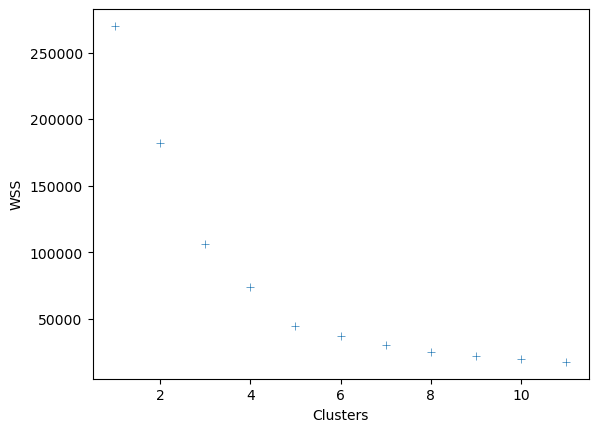

In [7]:
sns.scatterplot(x='Clusters', y='WSS', data=mycenters, marker="+")

In [8]:
import sklearn.metrics as metrics
for i in range (3,13):
    labels=cluster.KMeans(n_clusters=i,init='k-means++', random_state=200).fit(data_short).labels_
    print("Silhoutte score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(data_short,labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhoutte score for k(clusters) = 3 is 0.46761358158775423
Silhoutte score for k(clusters) = 4 is 0.4931963109249047
Silhoutte score for k(clusters) = 5 is 0.553931997444648
Silhoutte score for k(clusters) = 6 is 0.5379675585622219
Silhoutte score for k(clusters) = 7 is 0.5367379891273258
Silhoutte score for k(clusters) = 8 is 0.4592958445675391
Silhoutte score for k(clusters) = 9 is 0.45770857148861777
Silhoutte score for k(clusters) = 10 is 0.446735677440187
Silhoutte score for k(clusters) = 11 is 0.4472950813160941
Silhoutte score for k(clusters) = 12 is 0.4257901147260263


In [9]:
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(data[['Spending_Score', 'Income']])

In [10]:
data['Clusters'] = kmeans.labels_

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

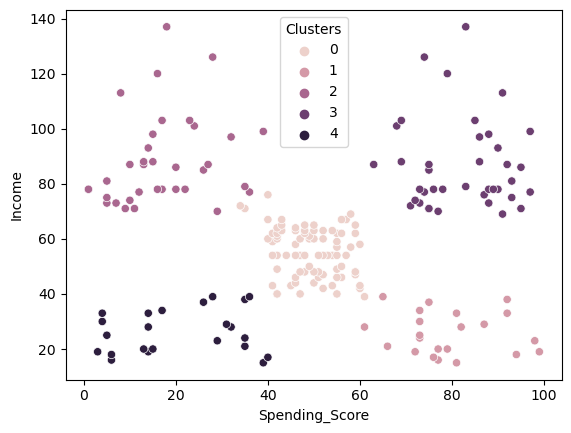

In [11]:
sns.scatterplot(x="Spending_Score", y="Income", hue="Clusters", data=data)